# Regressão Linear

## Introdução
A regressão linear é um dos modelos mais fundamentais em aprendizado de máquina supervisionado.  
Seu objetivo é **estimar uma variável de saída contínua** (alvo $y \in \mathbb{R}$) a partir de variáveis de entrada $x \in \mathbb{R}^d$.  

Formalmente, desejamos encontrar uma função linear da forma:

$$
h(x) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_d x_d = w^T \tilde{x}
$$

onde:
- $\tilde{x} = (1, x_1, \dots, x_d)$ inclui o termo de bias,
- $w = (w_0, w_1, \dots, w_d)$ é o vetor de parâmetros a serem aprendidos.

---

## Função de perda
Para avaliar a qualidade da hipótese $h(x)$, utilizamos a **função de perda quadrática**:

$$
L_D(h) = \frac{1}{N} \sum_{n=1}^N \big(h(x^{(n)}) - y^{(n)} \big)^2
$$

onde:
- $(x^{(n)}, y^{(n)})$ são os exemplos do conjunto de treinamento,
- $N$ é o número total de exemplos.

A tarefa de aprendizado consiste em encontrar $w$ que minimize $L_D(h)$.

---

## Soluções
Existem diferentes estratégias para determinar o vetor de parâmetros $w$:

1. **Solução Analítica (Equações Normais)**  
   Quando $d$ e $N$ não são muito grandes, podemos resolver o sistema linear:
   $$
   w = (X^T X)^{-1} X^T y
   $$
   onde $X$ é a matriz de dados de dimensão $N \times (d+1)$.

2. **Solução Iterativa (Gradiente Descendente)**  
   Para conjuntos grandes, o cálculo da inversa pode ser inviável.  
   O gradiente descendente ajusta $w$ iterativamente:
   $$
   w^{(r+1)} = w^{(r)} - \eta \nabla L(w^{(r)})
   $$
   com taxa de aprendizado $\eta$ e gradiente:
   $$
   \frac{\partial L}{\partial w_j} = \sum_{n=1}^N (h(x^{(n)}) - y^{(n)}) x^{(n)}_j
   $$

3. **SGD (Stochastic Gradient Descent)**  
   Em vez de usar todos os exemplos a cada iteração, atualizamos os pesos a partir de **um único exemplo** (ou mini-lote).  
   Isso reduz custo computacional e introduz ruído que ajuda a escapar de mínimos locais.

---

## Avaliação da Regressão Linear
Uma métrica amplamente utilizada é o **coeficiente de determinação** ($R^2$):

$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$

onde:
- $SS_{res} = \sum_{n=1}^N (y^{(n)} - \hat{y}^{(n)})^2$ (soma dos resíduos),
- $SS_{tot} = \sum_{n=1}^N (y^{(n)} - \bar{y})^2$ (soma total das variâncias).

Valores próximos de 1 indicam bom ajuste; valores próximos de 0 ou negativos indicam ajuste ruim.

# Importando o dataset

In [2]:
from pathlib import Path
import pandas as pd

# A função pd.read_csv() lê o arquivo e o carrega em um DataFrame do pandas.
DATA_PATH = Path.cwd().joinpath(Path("Exercicio01/dataset/data_0460_5832.csv"))
df = pd.read_csv(DATA_PATH)

# O comando .head() mostra as 5 primeiras linhas do DataFrame.
print("Primeiras 5 linhas do dataset:")
print(df.head())

# O comando .info() mostra um resumo técnico, incluindo os tipos de cada coluna.
print('\nInformações do DataFrame:')
df.info()

Primeiras 5 linhas do dataset:
      Sex  Age  Height  Weight  Shoe number
0  Female   53     154      59           36
1    Male   23     170      56           40
2  Female   23     167      63           37
3    Male   21     178      78           40
4  Female   25     153      58           36

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sex          257 non-null    object
 1   Age          257 non-null    int64 
 2   Height       257 non-null    int64 
 3   Weight       257 non-null    int64 
 4   Shoe number  257 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 10.2+ KB


# Tratamento dos dados

In [3]:
import numpy as np

# Copiar o df original para não sobrescrever
df_encoded = df.copy()

# Identificar colunas categóricas que só têm dois valores
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    valores = df_encoded[col].dropna().unique()
    if len(valores) == 2:
        # mapear automaticamente para 0/1
        mapping = {valores[0]: 0, valores[1]: 1}
        df_encoded[col] = df_encoded[col].map(mapping)
        print(f"Coluna {col} mapeada para {mapping}")
    else:
        df_encoded.drop(columns=[col], inplace=True)
# remove colunas constantes
num_cols = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if df_encoded[c].nunique(dropna=True) > 1]


Coluna Sex mapeada para {'Female': 0, 'Male': 1}


# Visualização da distribuicao dos dados, par a par

Colunas numéricas (incluindo binárias codificadas): ['Sex', 'Age', 'Height', 'Weight', 'Shoe number']


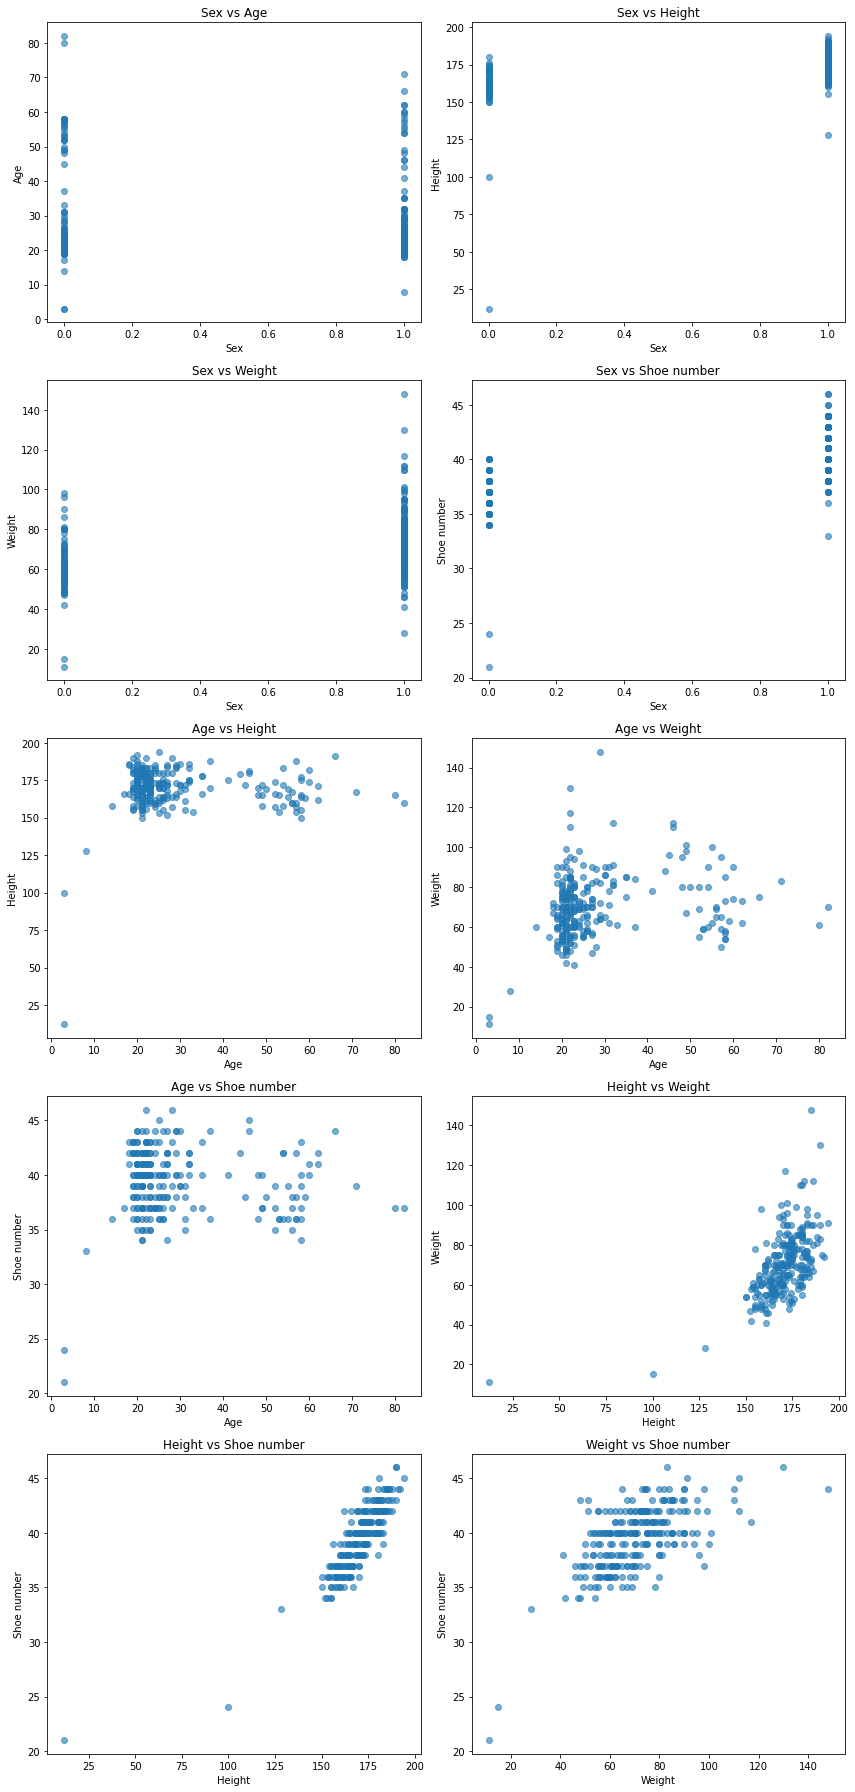

In [4]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

# Agora pega numéricas + as recém convertidas
num_cols = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
print("Colunas numéricas (incluindo binárias codificadas):", num_cols)

# Gerar todas as combinações 2 a 2
pairs = list(itertools.combinations(num_cols, 2))

fig, axes = plt.subplots(len(pairs)//2 + len(pairs)%2, 2, figsize=(12, 5*len(pairs)//2))
axes = axes.flatten()

for ax, (xcol, ycol) in zip(axes, pairs):
    ax.scatter(df_encoded[xcol], df_encoded[ycol], alpha=0.6)
    ax.set_xlabel(xcol)
    ax.set_ylabel(ycol)
    ax.set_title(f"{xcol} vs {ycol}")

# ocultar plots vazios
for ax in axes[len(pairs):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


### Regressão Linear Analítica

In [5]:
from types import SimpleNamespace

args = SimpleNamespace()
args.plot = True
args.top_k = 15

In [6]:
import pandas as pd
import numpy as np
import time, psutil, os
import itertools
import torch

rows = []
cols = df_encoded.columns.tolist()

for x_col, y_col in itertools.permutations(cols, 2):  # assimétrico: x→y e y→x
    start_time = time.time()
    process = psutil.Process(os.getpid())

    # Converte para tensores
    x = torch.tensor(df_encoded[x_col].values, dtype=torch.float32)
    y = torch.tensor(df_encoded[y_col].values, dtype=torch.float32)

    # Monta matriz de projeto: [1, x]
    X = torch.stack([torch.ones_like(x), x], dim=1)

    # Regressão linear fechada: w = (X⁺ y)
    w = (torch.linalg.pinv(X) @ y).view(-1)  # [w0, w1]

    # Predição
    yhat = X @ w

    # Métricas
    # ===== Estatísticas clássicas =====
    N = len(y)
    ss_res = torch.sum((y - yhat)**2)          # SSE
    ss_tot = torch.sum((y - torch.mean(y))**2) # SST
    ss_reg = torch.sum((yhat - torch.mean(y))**2) # SSR
    r2  = 1.0 - (ss_res / (ss_tot + 1e-12))
    mse = torch.mean((y - yhat)**2)

    # ===== Tempo e memória =====
    wall_time_s = time.time() - start_time
    peak_mem_mb = process.memory_info().rss / 1024**2

    # ===== Resultados =====
    rows.append({
        "kind": "pytorch",
        "x": x_col, "y": y_col,
        "w0": float(w[0]), "w1": float(w[1]),
        "R2": float(r2), "MSE": float(mse),
        "SSE": float(ss_res), "SSR": float(ss_reg), "SST": float(ss_tot),
        "N": N,
        "wall_s": wall_time_s,
        "peak_mb": peak_mem_mb,
        "iters": None,
        "grad_norm": None,
        "gap_w": None,
        "cond(X)": float(torch.linalg.cond(X))
    })

# Resultado final
result = pd.DataFrame(rows).sort_values(by=["R2", "MSE"], ascending=[False, True]).reset_index(drop=True)

if hasattr(args, "top_k") and args.top_k is not None:
    result = result.head(args.top_k)

display(result)


,kind,x,y,w0,w1,R2,MSE,SSE,SSR,SST,N,wall_s,peak_mb,iters,grad_norm,gap_w,cond(X)
0,pytorch,Height,Shoe number,9.639357,0.175404,0.710977,2.609349,670.602600,1649.638550,2320.241211,257,0.000653,259.132812,None,None,None,2020.193970
1,pytorch,Shoe number,Height,10.121574,4.053376,0.710977,60.299015,15496.846680,38121.218750,53618.070312,257,0.000645,259.132812,None,None,None,522.453186
2,pytorch,Sex,Shoe number,36.469139,4.417218,0.466478,4.816732,1237.900146,1082.336060,2320.241211,257,0.000677,259.132812,None,None,None,3.325835
3,pytorch,Shoe number,Sex,-3.485925,0.105604,0.466478,0.115155,29.594913,25.875917,55.470810,257,0.000637,259.132812,None,None,None,522.453186
4,pytorch,Shoe number,Weight,-60.230240,3.307012,0.380260,160.916183,41355.460938,25374.919922,66730.390625,257,0.000648,259.132812,None,None,None,522.453186
5,pytorch,Weight,Shoe number,31.401749,0.114986,0.380260,5.595119,1437.945435,882.296631,2320.241211,257,0.000648,259.132812,None,None,None,323.549744
6,pytorch,Height,Weight,-38.473389,0.639523,0.328625,174.323517,44801.144531,21929.248047,66730.390625,257,0.000653,259.132812,None,None,None,2020.193970
7,pytorch,Weight,Height,134.042191,0.513859,0.328624,140.069489,35997.859375,17620.218750,53618.070312,257,0.000633,259.132812,None,None,None,323.549744
8,pytorch,Height,Sex,-2.002970,0.015791,0.241039,0.163814,42.100170,13.370644,55.470810,257,0.000668,259.132812,None,None,None,2020.193970
9,pytorch,Sex,Height,159.753113,15.263916,0.241039,158.342468,40694.015625,12923.986328,53618.070312,257,0.018915,259.132812,None,None,None,3.325835


## Salvando os dados

In [7]:
from pathlib import Path

# Caminho da pasta onde vamos salvar
DATA_PATH = Path.cwd().joinpath("Exercicio01/tabela")
DATA_PATH.mkdir(parents=True, exist_ok=True)  # cria se não existir

# Ordem desejada das colunas
col_order = [
    "kind", "x", "y", "w0", "w1",
    "SSE", "SSR", "SST", "R2", "MSE",
    "iters", "grad_norm", "wall_s", "peak_mb", "N"
]

# Reorganiza (somente as que realmente existem no DataFrame)
cols_present = [c for c in col_order if c in result.columns]
results = result[cols_present]

# Salva
results_file = DATA_PATH / "results_linear.csv"
results.to_csv(results_file, index=False)

print(f"Arquivo salvo em: {results_file}")
print("Colunas na ordem:", results.columns.tolist())

Arquivo salvo em: /home/nara/MAC5921-Deep-Learning/Exercicio01/tabela/results_linear.csv
Colunas na ordem: ['kind', 'x', 'y', 'w0', 'w1', 'SSE', 'SSR', 'SST', 'R2', 'MSE', 'iters', 'grad_norm', 'wall_s', 'peak_mb', 'N']


In [8]:
@torch.no_grad()
def plot_pair(df_num: pd.DataFrame, x_col: str, y_col: str, title_suffix: str = ""):
    # tensores
    x = torch.tensor(df_num[x_col].values, dtype=torch.float32)
    y = torch.tensor(df_num[y_col].values, dtype=torch.float32)
    X = design_matrix_1d(x)
    w = closed_form_line(X, y)
    yhat = (X @ w)

    # métricas
    m = metrics(y, yhat)

    # para linhas suaves, ordenar por x
    order = torch.argsort(x)
    x_ord = x[order].numpy()
    yhat_ord = yhat[order].numpy()

    # média de Y
    y_bar = float(torch.mean(y))

    # --- PLOT ---
    plt.figure(figsize=(7.2, 5.0))

    # 1) Dispersão dos dados
    plt.scatter(x.numpy(), y.numpy(), label="Dados (Y vs X)", alpha=0.8)

    # 2) Reta de regressão (ŷ = w0 + w1*x) (traçada sobre x ordenado)
    plt.plot(x_ord, yhat_ord, color="red", linewidth=2.0, label="Reta de regressão (ŷ)")

    # 3) Linha horizontal: média de Y
    plt.axhline(y=y_bar, linestyle="--", color="green", linewidth=1.5, label="Média de Y (ȳ)")

    # 4) Resíduos
    xx = x.numpy()
    yy = y.numpy()
    yyhat = yhat.numpy()
    for xi, yi, ypi in zip(xx, yy, yyhat):
        # segmento vertical (do previsto ŷ ao observado y)
        plt.vlines(x=xi, ymin=min(yi, ypi), ymax=max(yi, ypi), linewidth=0.8, color="gray", alpha=0.5)

    # 5) Título e legendas
    ttl = f"{y_col} ~ {x_col}"
    if title_suffix:
        ttl += f" — {title_suffix}"
    plt.title(ttl)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(loc="best")
    plt.grid(alpha=0.25)

    # 6) Anotações das métricas no canto
    txt = (f"R² = {m['R2']:.4f}\n"
           f"MSE = {m['MSE']:.4g}\n"
           f"SST = {m['SST']:.4g}\n"
           f"SSR = {m['SSR']:.4g}\n"
           f"SSE = {m['SSE']:.4g}")
    plt.gcf().text(1.5, 0.5, txt, ha="right", va="bottom", fontsize=9,
                   bbox=dict(boxstyle="round", alpha=0.08, edgecolor="none"))

    plt.tight_layout()
    plt.show()

# ================== Plot Manager ==================
if args.plot:
    for _, row in result.iterrows():
        x_col = row["x"]
        y_col = row["y"]

        plot_pair(df_encoded, x_col, y_col, title_suffix=f"R²={row['R2']:.3f}")
else:
    print("[INFO] Para plotar execute usando a opção (args.plot = True).")


NameError: name 'design_matrix_1d' is not defined